## Sierra Leone AID funding and HDI - Time Series Regression

In [2]:
#import required packages
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pl
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Data Load

Aid project disbursements in Sierra Leone by Area

In [3]:
#read in the project data. 
#As discussed in other parts, this data represents the sum of 
#disbursed funding for sectors of projects over that time period
df = pd.read_csv("projects.csv")

# print dataset, showing all 22 years
print("Aid project disbursements in Sierra Leone by sector, 1992-2014")
df.round()


Aid project disbursements in Sierra Leone by sector, 1992-2014


,Year,Agriculture,Government,Education,Health
0,1992,0.0,0.0,51750.0,0.0
1,1993,0.0,0.0,51750.0,0.0
2,1994,0.0,0.0,51750.0,0.0
3,1995,0.0,0.0,51750.0,0.0
4,1996,0.0,0.0,51750.0,0.0
5,1997,0.0,0.0,51750.0,0.0
6,1998,0.0,112370.0,51750.0,0.0
7,1999,0.0,112370.0,51750.0,0.0
8,2000,0.0,112370.0,51750.0,2321161.0
9,2001,0.0,380180.0,51750.0,2321161.0


In [4]:
# check the datatypes are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
Year           23 non-null int64
Agriculture    23 non-null float64
Government     23 non-null float64
Education      23 non-null float64
Health         23 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1000.0 bytes


In [5]:
#import HDI dataset and show last 5 rows
hdi_df = pd.read_csv('hdi.csv')
hdi_df = hdi_df[hdi_df['Year'] <2015]
hdi_df.tail()

,Year,Education Index,Agri Employment,Income Index,Life Expectancy Index
18,2010,0.349,63.7,0.377,0.434
19,2011,0.357,63.2,0.379,0.447
20,2012,0.364,61.2,0.404,0.458
21,2013,0.372,58.2,0.423,0.468
22,2014,0.374,57.7,0.424,0.476


In [6]:
# check the datatypes are correct
hdi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 5 columns):
Year                     23 non-null int64
Education Index          23 non-null float64
Agri Employment          23 non-null float64
Income Index             23 non-null float64
Life Expectancy Index    23 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1.1 KB


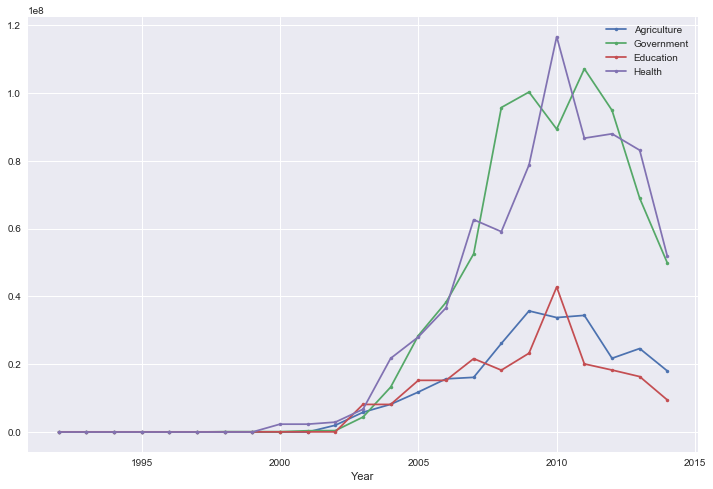

In [7]:
#plot the funding over time
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df.set_index('Year').plot(ax=ax, marker=".", linestyle="-")

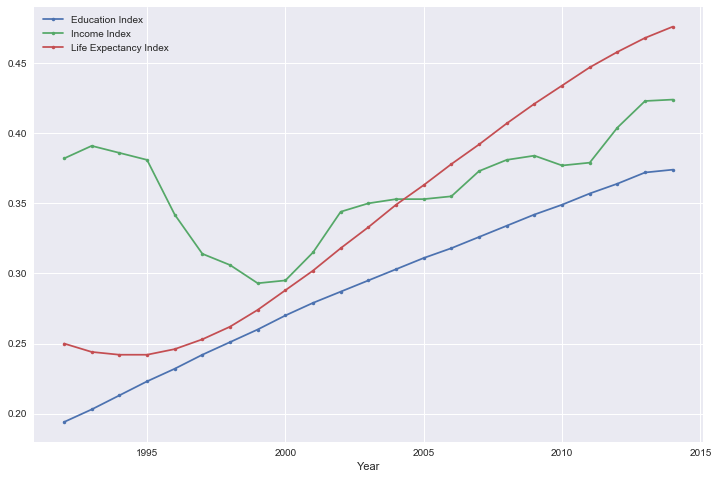

In [8]:
#plot the HDI over time
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
hdi_df.drop(columns=['Agri Employment']).set_index('Year').plot(ax=ax, marker=".", linestyle="-")

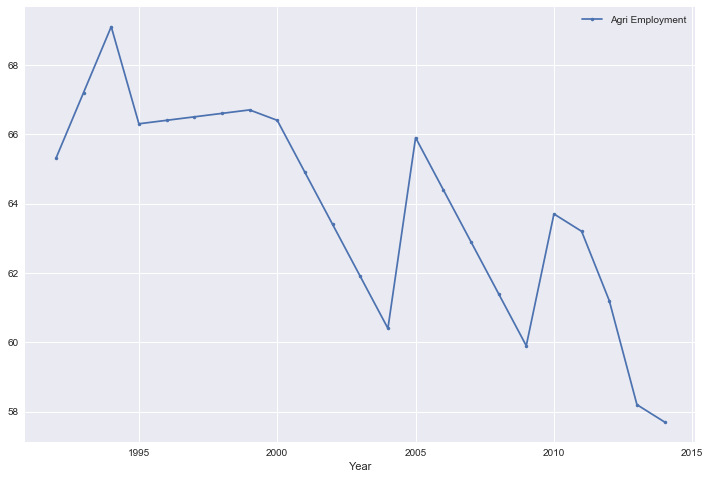

In [9]:
#plot the agricultural employment over time
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
hdi_df[['Year','Agri Employment']].set_index('Year').plot(ax=ax, marker=".", linestyle="-")

In [10]:
#combine the datasets 
df_c = pd.concat([df.reset_index(drop=True),hdi_df.reset_index(drop=True).drop(columns='Year')], axis=1)
df_c.head()

,Year,Agriculture,Government,Education,Health,Education Index,Agri Employment,Income Index,Life Expectancy Index
0,1992,0.0,0.0,51750.07143,0.0,0.194,65.3,0.382,0.250
1,1993,0.0,0.0,51750.07143,0.0,0.203,67.2,0.391,0.244
2,1994,0.0,0.0,51750.07143,0.0,0.213,69.1,0.386,0.242
3,1995,0.0,0.0,51750.07143,0.0,0.223,66.3,0.381,0.242
4,1996,0.0,0.0,51750.07143,0.0,0.232,66.4,0.342,0.246


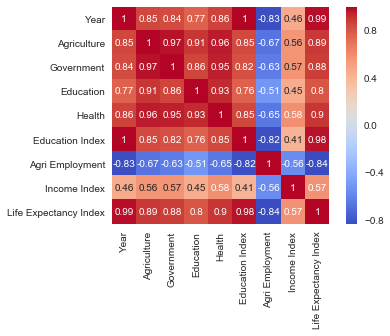

In [11]:
#produce a correlation heatmap between the variables
sns.heatmap(df_c.corr(),cmap="coolwarm", annot=True, square=True)

The correlations we are most interested in are:
* Education Index with Education = 0.76, showing a positive relationship. Interestingly Health, Goverment and Agricultural spending are correlate more highly with Educational Index performance than Educational spending which I did not expect.

* Life Expectancy Index with Health = 0.9, showing a positive relationship. Health spending has the highest correlation with the Index amongst the categories of spending which is what I expected.

* Income Index with Goverment = 0.57, showing a weak positive relationship. I expected Goverment spending to have the most correlation amongst the categories of spending, however Health spending has a slightly higher correlation. 

* Agricultural Employment with Agriculture = -0.67, showing a moderate negative relationship. I expected Agricultural spending to have a high negative correlation with Agricultural employment, and while Agricultural spending has the largest correlation amongst spending sectors, it is not a strong relationship  

Lets look at education

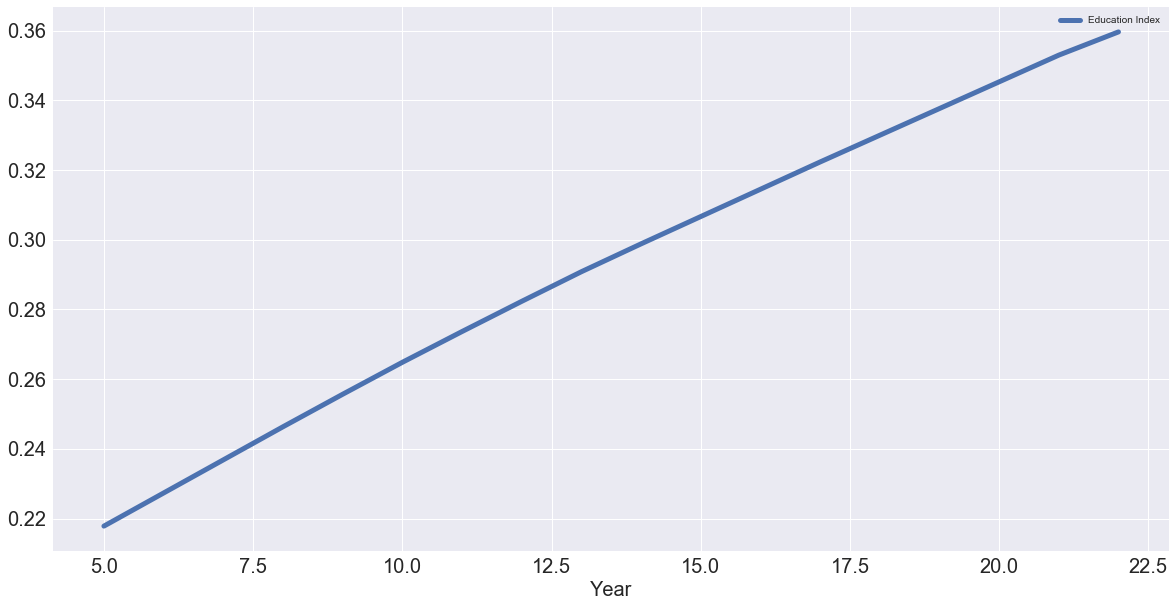

In [12]:
#smooth the data to see the long term trend
edu_i = df_c[['Education Index']]
edu_i.rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

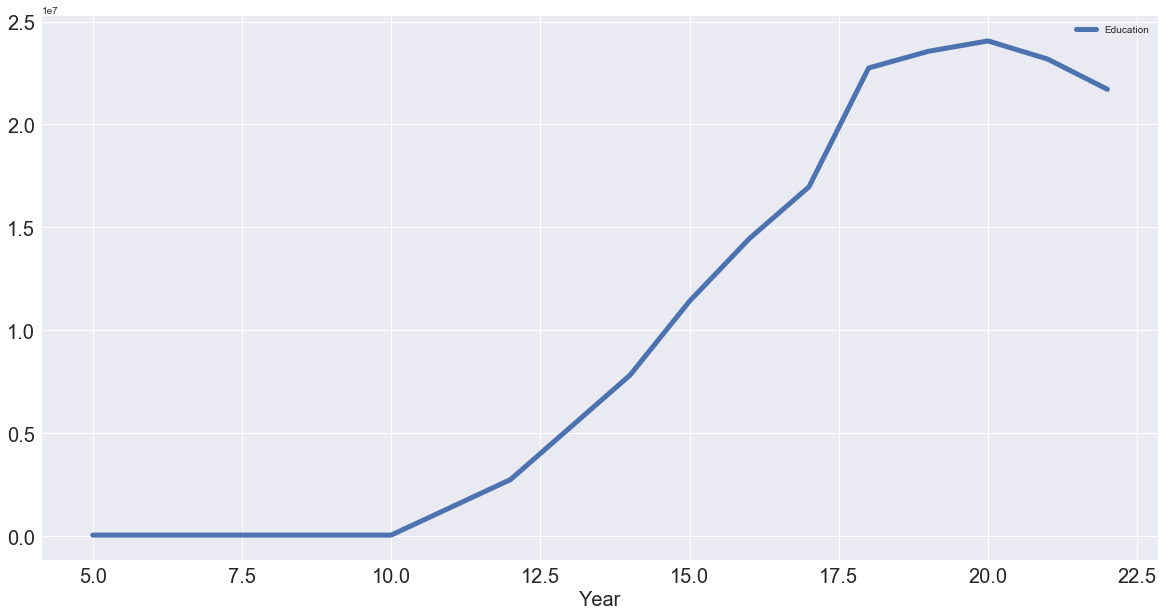

In [13]:
#smooth the data to see the long term trend
edu_f = df_c[['Education']]
edu_f.rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [14]:
#set up target and predictor columns
y = df_c[['Education Index']]
X = df_c[['Education']].astype('int64')

In [15]:
X

,Education
0,51750
1,51750
2,51750
3,51750
4,51750
5,51750
6,51750
7,51750
8,51750
9,51750


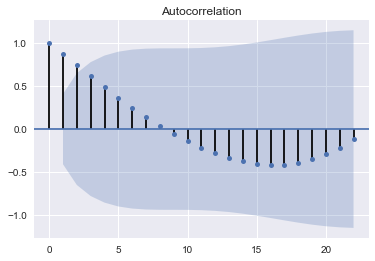

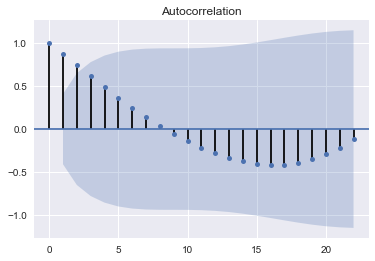

In [16]:
#plot autocorrelation
tsaplots.plot_acf(y)

In [17]:
#set up an autocorrelation column for the target
X['Education Index Lag 1'] = y.shift(1)
#set up a lag 1 column for the predictor which should be have more predictive power than lag 0 values
X['Education Lag 1'] = X['Education'].shift(1)
#set up the intercept for the statsmodel regression
X['Intercept'] = 1

In [18]:
#drop the first row of data due to the autocorrelation
X = X.iloc[1:,:]

y = y.iloc[1:,:]

In [19]:
#add a trend column
X['trend'] = range(1,len(X.index)+1)

X

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Education,Education Index Lag 1,Education Lag 1,Intercept,trend
1,51750,0.194,51750.0,1,1
2,51750,0.203,51750.0,1,2
3,51750,0.213,51750.0,1,3
4,51750,0.223,51750.0,1,4
5,51750,0.232,51750.0,1,5
6,51750,0.242,51750.0,1,6
7,51750,0.251,51750.0,1,7
8,51750,0.260,51750.0,1,8
9,51750,0.270,51750.0,1,9
10,51750,0.279,51750.0,1,10


In [20]:
y.head(5)

,Education Index
1,0.203
2,0.213
3,0.223
4,0.232
5,0.242


In [21]:
X

,Education,Education Index Lag 1,Education Lag 1,Intercept,trend
1,51750,0.194,51750.0,1,1
2,51750,0.203,51750.0,1,2
3,51750,0.213,51750.0,1,3
4,51750,0.223,51750.0,1,4
5,51750,0.232,51750.0,1,5
6,51750,0.242,51750.0,1,6
7,51750,0.251,51750.0,1,7
8,51750,0.260,51750.0,1,8
9,51750,0.270,51750.0,1,9
10,51750,0.279,51750.0,1,10


In [22]:
#fit the regression
fit_1 = sm.OLS(y, X).fit()

# Inspect the results
print(fit_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Education Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.184e+04
Date:                Sun, 18 Nov 2018   Prob (F-statistic):           4.95e-29
Time:                        16:54:03   Log-Likelihood:                 120.90
No. Observations:                  22   AIC:                            -231.8
Df Residuals:                      17   BIC:                            -226.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Education              2.056e-

A P value of 0.171 suggests that if the null hypothesis were true (that Education Lag 1 funding has no effect on Education Index), we would expect this kind of result 17% of the time. This is not a statistically significant effect. 

(array([1., 0., 1., 2., 6., 7., 3., 1., 0., 1.]),
 array([-0.00279446, -0.00225833, -0.00172221, -0.00118608, -0.00064996,
        -0.00011384,  0.00042229,  0.00095841,  0.00149454,  0.00203066,
         0.00256678]),
 <a list of 10 Patch objects>)

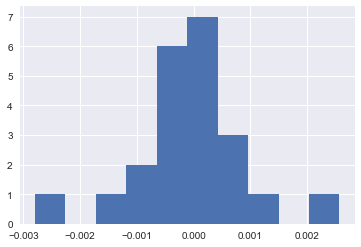

In [23]:
#plot the residuals, it should look roughly normally distributed around 0
plt.hist(fit_1.resid)

In [24]:
#fit the model again, taking away the predictors we are not interested in 
fit_2 = sm.OLS(y, X.drop(['trend','Education','Education Index Lag 1'], axis = 1)).fit()

# Inspect the results
print(fit_2.summary())

                            OLS Regression Results                            
Dep. Variable:        Education Index   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     37.97
Date:                Sun, 18 Nov 2018   Prob (F-statistic):           5.09e-06
Time:                        16:54:03   Log-Likelihood:                 45.351
No. Observations:                  22   AIC:                            -86.70
Df Residuals:                      20   BIC:                            -84.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Education Lag 1  3.754e-09   6.09e-10     

Conclusion 
* Using Education funding from the previous year, to predict Education Index performance in the current year, the predictive power (R squared) is only 0.638, indicated that Education funding is not a strong predictor of Education Index performance

(array([2., 1., 1., 2., 2., 3., 4., 4., 1., 2.]),
 array([-0.06382497, -0.05220101, -0.04057705, -0.02895309, -0.01732913,
        -0.00570518,  0.00591878,  0.01754274,  0.0291667 ,  0.04079066,
         0.05241462]),
 <a list of 10 Patch objects>)

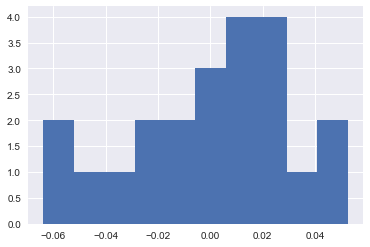

In [25]:
#plot the residuals of the new fit
plt.hist(fit_2.resid)

In [26]:
#This part I can't quite get to work. Using the fit_2, 
#I want to predict the 2014 value based on the 2013 Education Funding
hdi_df = pd.read_csv('hdi.csv')
hdi_df_p = hdi_df[hdi_df['Year'] > 2010]
hdi_df_p

,Year,Education Index,Agri Employment,Income Index,Life Expectancy Index
19,2011,0.357,63.2,0.379,0.447
20,2012,0.364,61.2,0.404,0.458
21,2013,0.372,58.2,0.423,0.468
22,2014,0.374,57.7,0.424,0.476
23,2015,0.376,60.9,0.387,0.483
24,2016,0.382,60.6,0.377,0.490
25,2017,0.390,60.6,0.380,0.496


In [27]:
#check the 2014 values as starting point
project_p = df[df['Year'] == 2013]
project_p

,Year,Agriculture,Government,Education,Health
21,2013,24639726.58,68981822.72,16359359.69,83156256.84


In [28]:
#This part I can't get to work, 
#I want to plug in the Education Index value in 2014, 
#and use the fit_2 model to predict what the next value will be.
print("Using the 2013 Education spending as a predictor, the 2014 Education Index value should be" + str(fit_2.predict([16359359.69, 1])))

Using the 2013 Education spending as a predictor, the 2014 Education Index value should be[0.32158538]


Lets look at Health

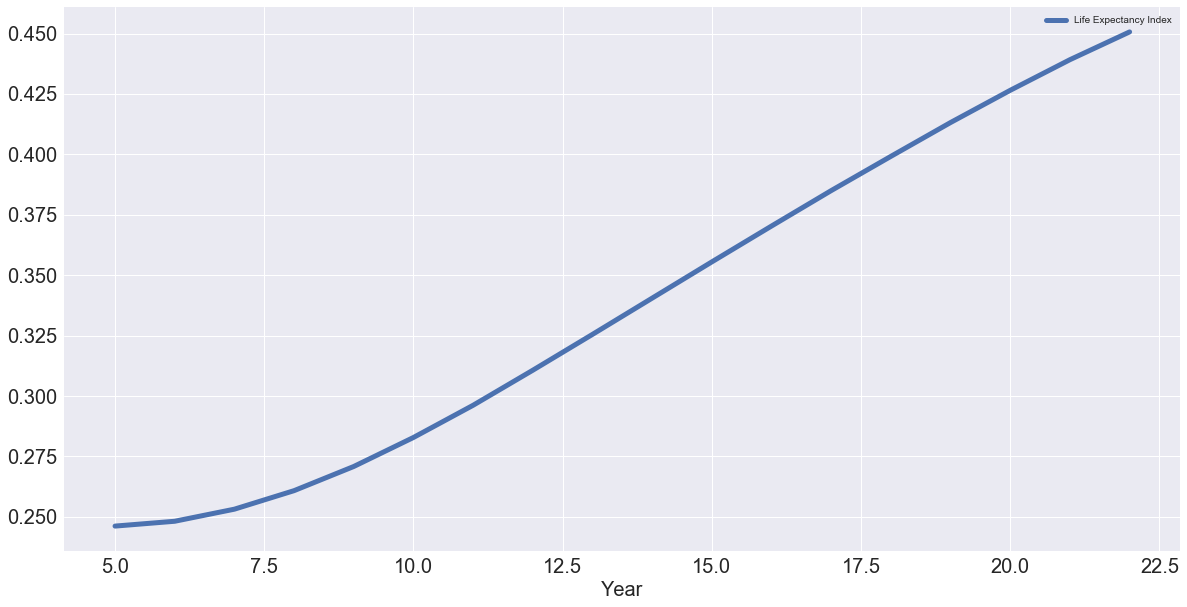

In [29]:
health_i = df_c[['Life Expectancy Index']]
health_i.rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

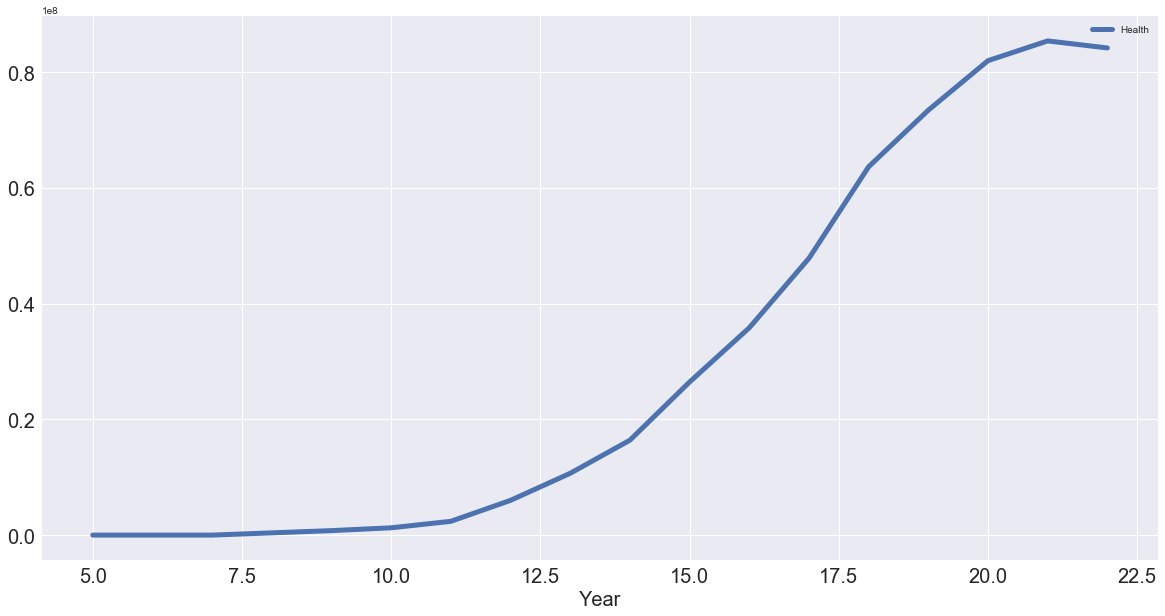

In [30]:
health_i = df_c[['Health']]
health_i.rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [31]:
y = df_c[['Life Expectancy Index']]
X = df_c[['Health']].astype('int64')

In [32]:
X

,Health
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,2321160
9,2321160


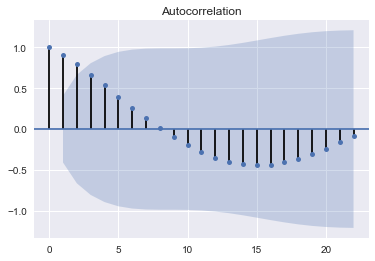

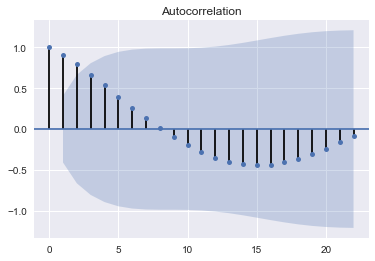

In [33]:
tsaplots.plot_acf(y)

In [34]:
X['Life Expectancy Index Lag 1'] = y.shift(1)
X['Health Lag 1'] = X['Health'].shift(1)
X['Intercept'] = 1

In [35]:
X = X.iloc[1:,:]

y = y.iloc[1:,:]

In [36]:
# trend
X['trend'] = range(1,len(X.index)+1)

X

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Health,Life Expectancy Index Lag 1,Health Lag 1,Intercept,trend
1,0,0.250,0.0,1,1
2,0,0.244,0.0,1,2
3,0,0.242,0.0,1,3
4,0,0.242,0.0,1,4
5,0,0.246,0.0,1,5
6,0,0.253,0.0,1,6
7,0,0.262,0.0,1,7
8,2321160,0.274,0.0,1,8
9,2321160,0.288,2321160.0,1,9
10,2920368,0.302,2321160.0,1,10


In [37]:
y.head(5)

,Life Expectancy Index
1,0.244
2,0.242
3,0.242
4,0.246
5,0.253


In [38]:
fit_1 = sm.OLS(y, X).fit()

# Inspect the results
print(fit_1.summary())

                              OLS Regression Results                             
Dep. Variable:     Life Expectancy Index   R-squared:                       0.999
Model:                               OLS   Adj. R-squared:                  0.999
Method:                    Least Squares   F-statistic:                     6347.
Date:                   Sun, 18 Nov 2018   Prob (F-statistic):           9.88e-27
Time:                           16:54:04   Log-Likelihood:                 104.49
No. Observations:                     22   AIC:                            -199.0
Df Residuals:                         17   BIC:                            -193.5
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

A P value of 0.029 suggests that if the null hypothesis were true (that Health Lag 1 funding has no effect on Education Index), we would expect this kind of result 2.9% of the time. As this is lower than the generally accepted level of statistical significance (5%), this is suggest there is enough evidence to reject the null hypothesis, and conclude that Health Lag 1 funding is a predictor of the Life Expectancy Index 

(array([1., 1., 4., 2., 2., 4., 5., 1., 1., 1.]),
 array([-4.22356042e-03, -3.36268612e-03, -2.50181181e-03, -1.64093750e-03,
        -7.80063197e-04,  8.08111097e-05,  9.41685416e-04,  1.80255972e-03,
         2.66343403e-03,  3.52430834e-03,  4.38518264e-03]),
 <a list of 10 Patch objects>)

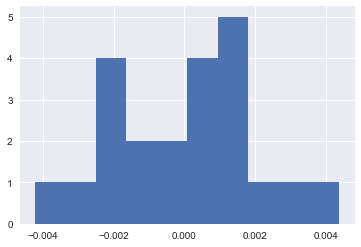

In [39]:
plt.hist(fit_1.resid)

In [40]:
fit_2 = sm.OLS(y, X.drop(['trend','Health','Life Expectancy Index Lag 1'], axis = 1)).fit()

# Inspect the results
print(fit_2.summary())

                              OLS Regression Results                             
Dep. Variable:     Life Expectancy Index   R-squared:                       0.836
Model:                               OLS   Adj. R-squared:                  0.828
Method:                    Least Squares   F-statistic:                     102.1
Date:                   Sun, 18 Nov 2018   Prob (F-statistic):           2.66e-09
Time:                           16:54:05   Log-Likelihood:                 43.982
No. Observations:                     22   AIC:                            -83.96
Df Residuals:                         20   BIC:                            -81.78
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Health Lag 1  1.96

Conclusion 
* Using Health spending from the previous year, to predict Life Expectancy Index performance in the current year, the predicted power (R squared) is 0.828, indicating that Health spending is a reasonably strong predictor of Life Expectancy Index performance

(array([1., 0., 5., 1., 1., 4., 2., 1., 5., 2.]),
 array([-0.06692982, -0.05515979, -0.04338976, -0.03161973, -0.0198497 ,
        -0.00807967,  0.00369036,  0.01546039,  0.02723042,  0.03900045,
         0.05077048]),
 <a list of 10 Patch objects>)

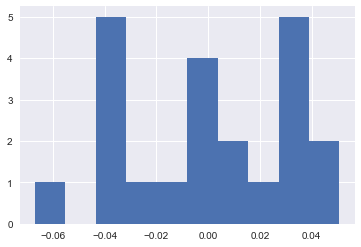

In [41]:
plt.hist(fit_2.resid)

Let's look at Agriculture

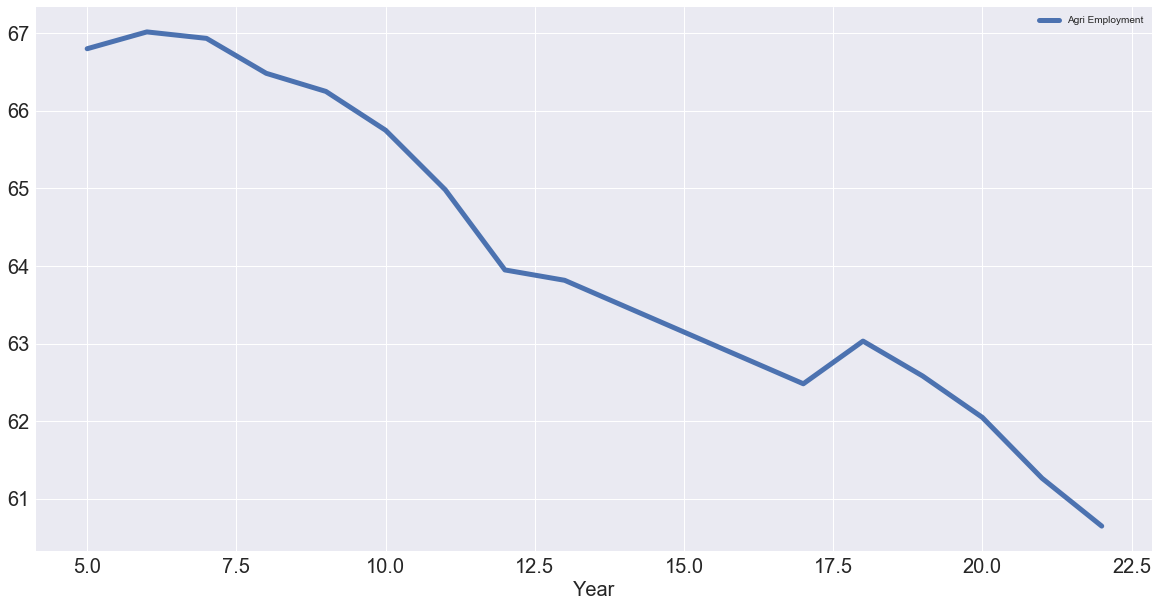

In [42]:
agri_e = df_c[['Agri Employment']]
agri_e.rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

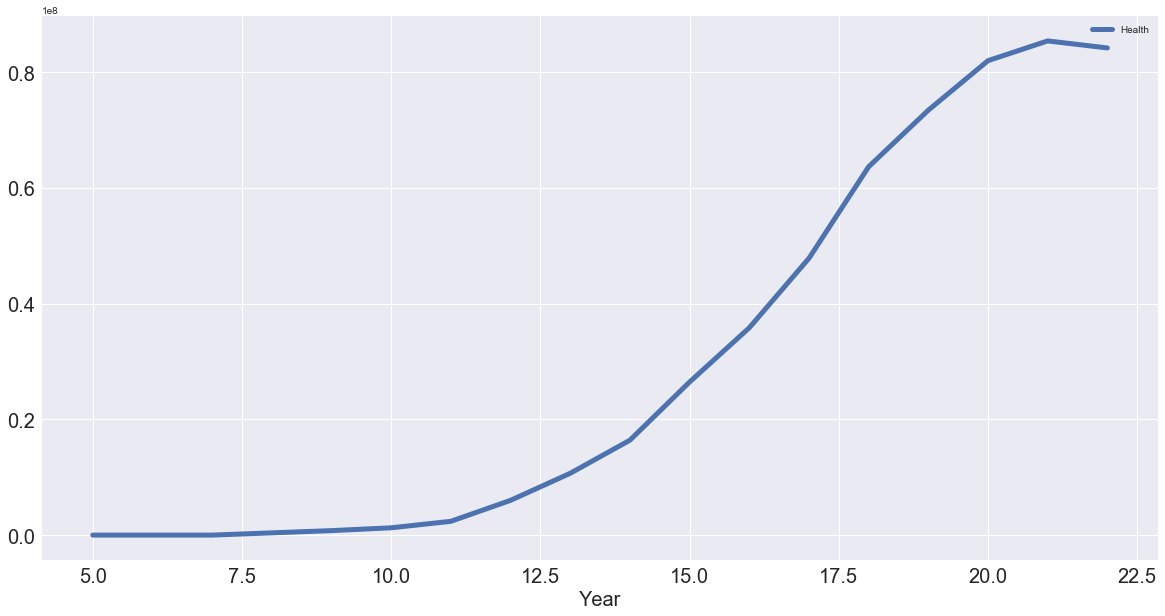

In [43]:
health_f = df_c[['Health']]
health_f.rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [44]:
y = df_c[['Agri Employment']]
X = df_c[['Agriculture']].astype('int64')

In [45]:
X

,Agriculture
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


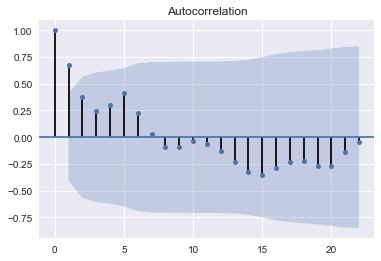

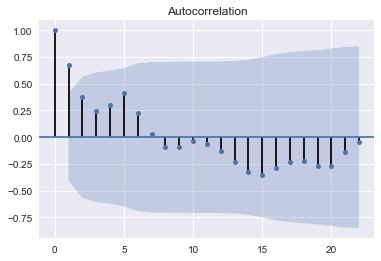

In [46]:
tsaplots.plot_acf(y)

In [47]:
X['Agri Employment Lag 1'] = y.shift(1)
X['Agriculture Lag 1'] = X['Agriculture'].shift(1)
X['Intercept'] = 1

In [48]:
X = X.iloc[1:,:]

y = y.iloc[1:,:]

In [49]:
# trend
X['trend'] = range(1,len(X.index)+1)

X

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Agriculture,Agri Employment Lag 1,Agriculture Lag 1,Intercept,trend
1,0,65.3,0.0,1,1
2,0,67.2,0.0,1,2
3,0,69.1,0.0,1,3
4,0,66.3,0.0,1,4
5,0,66.4,0.0,1,5
6,0,66.5,0.0,1,6
7,0,66.6,0.0,1,7
8,0,66.7,0.0,1,8
9,0,66.4,0.0,1,9
10,2005538,64.9,0.0,1,10


In [50]:
y.head(5)

,Agri Employment
1,67.2
2,69.1
3,66.3
4,66.4
5,66.5


In [51]:
fit_1 = sm.OLS(y, X).fit()

# Inspect the results
print(fit_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Agri Employment   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     15.65
Date:                Sun, 18 Nov 2018   Prob (F-statistic):           1.54e-05
Time:                        16:54:06   Log-Likelihood:                -38.608
No. Observations:                  22   AIC:                             87.22
Df Residuals:                      17   BIC:                             92.67
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Agriculture           -2.074e-

A P value of 0.177 suggests that if the null hypothesis were true (that Agricultural Funding Lag 1 funding has no effect on Agri Employment), we would expect this kind of result 17.7% of the time. This is not a statistically significant effect. 

(array([3., 4., 2., 4., 3., 4., 1., 0., 0., 1.]),
 array([-2.16076497, -1.54681271, -0.93286044, -0.31890818,  0.29504408,
         0.90899635,  1.52294861,  2.13690088,  2.75085314,  3.3648054 ,
         3.97875767]),
 <a list of 10 Patch objects>)

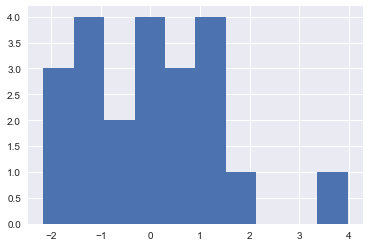

In [52]:
plt.hist(fit_1.resid)

In [53]:
fit_2 = sm.OLS(y, X.drop(['trend','Agriculture','Agri Employment Lag 1'], axis = 1)).fit()

# Inspect the results
print(fit_2.summary())

                            OLS Regression Results                            
Dep. Variable:        Agri Employment   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     14.14
Date:                Sun, 18 Nov 2018   Prob (F-statistic):            0.00123
Time:                        16:54:06   Log-Likelihood:                -49.709
No. Observations:                  22   AIC:                             103.4
Df Residuals:                      20   BIC:                             105.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Agriculture Lag 1 -1.527e-07   4.06e-0

Conclusion 
* Using Agricultural funding from the previous year, to predict Agricultural Employment in the current year, the predictive power (R squared) is only 0.385, indicating that Agricultural funding is not a strong predictor of Agricultural Employment.

(array([3., 1., 1., 2., 1., 1., 8., 2., 1., 2.]),
 array([-4.17961084, -3.39299519, -2.60637955, -1.8197639 , -1.03314825,
        -0.2465326 ,  0.54008305,  1.3266987 ,  2.11331435,  2.89993   ,
         3.68654564]),
 <a list of 10 Patch objects>)

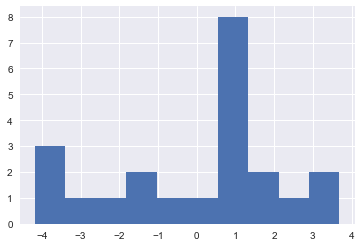

In [54]:
plt.hist(fit_2.resid)

Lets look at Income

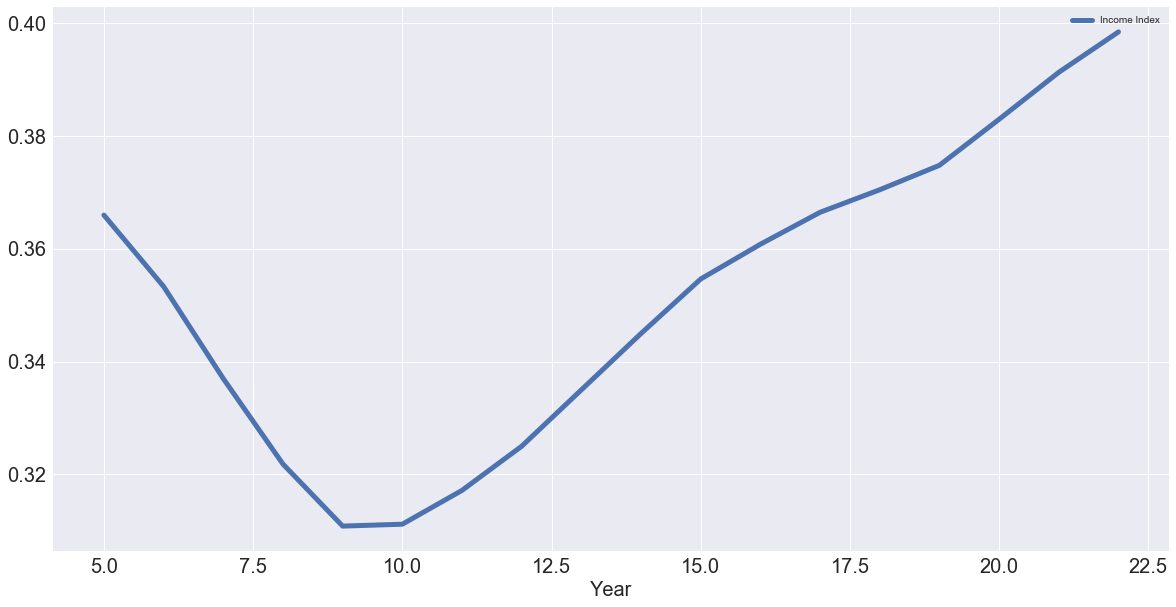

In [55]:
income_i = df_c[['Income Index']]
income_i.rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

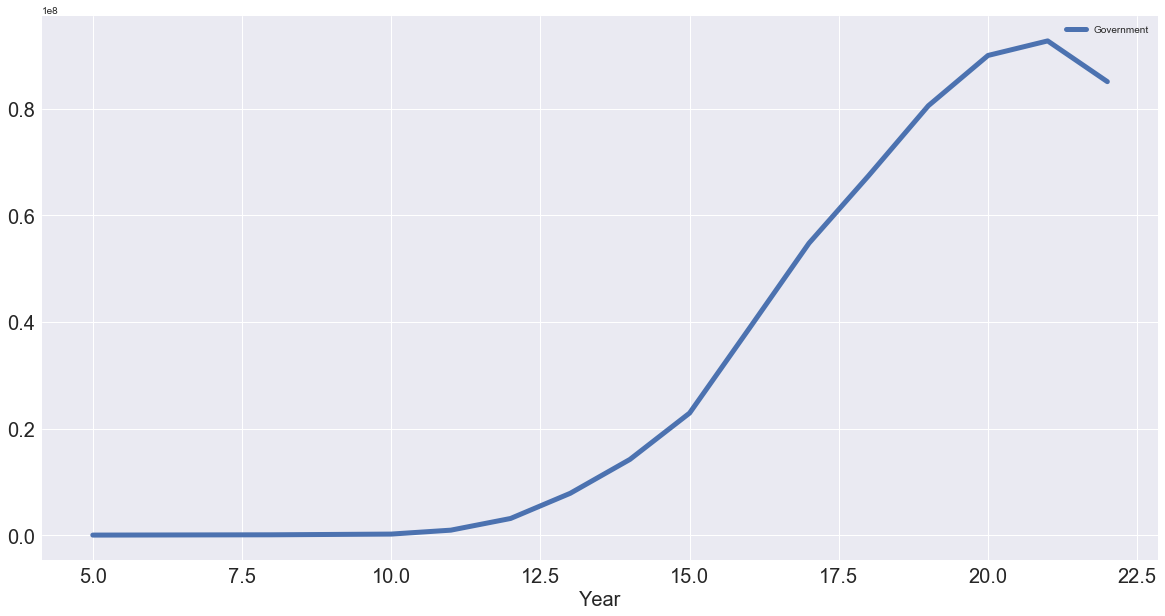

In [56]:
government_f = df_c[['Government']]
government_f.rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [57]:
y = df_c[['Income Index']]
X = df_c[['Government']].astype('int64')

In [58]:
X

,Government
0,0
1,0
2,0
3,0
4,0
5,0
6,112370
7,112370
8,112370
9,380179


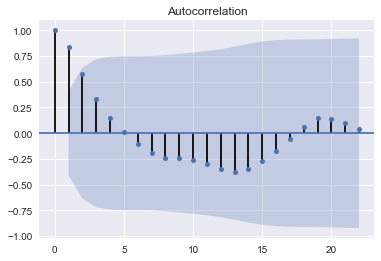

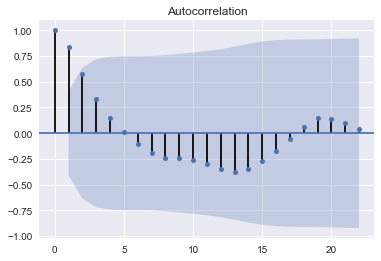

In [59]:
tsaplots.plot_acf(y)

In [60]:
X['Income Index Lag 1'] = y.shift(1)
X['Government Lag 1'] = X['Government'].shift(1)
X['Intercept'] = 1

In [61]:
X = X.iloc[1:,:]

y = y.iloc[1:,:]

In [62]:
# trend
X['trend'] = range(1,len(X.index)+1)

X

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Government,Income Index Lag 1,Government Lag 1,Intercept,trend
1,0,0.382,0.0,1,1
2,0,0.391,0.0,1,2
3,0,0.386,0.0,1,3
4,0,0.381,0.0,1,4
5,0,0.342,0.0,1,5
6,112370,0.314,0.0,1,6
7,112370,0.306,112370.0,1,7
8,112370,0.293,112370.0,1,8
9,380179,0.295,112370.0,1,9
10,424635,0.315,380179.0,1,10


In [63]:
y.head(5)

,Income Index
1,0.391
2,0.386
3,0.381
4,0.342
5,0.314


In [64]:
fit_1 = sm.OLS(y, X).fit()

# Inspect the results
print(fit_1.summary())

                            OLS Regression Results                            
Dep. Variable:           Income Index   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     28.83
Date:                Sun, 18 Nov 2018   Prob (F-statistic):           2.24e-07
Time:                        16:54:08   Log-Likelihood:                 63.752
No. Observations:                  22   AIC:                            -117.5
Df Residuals:                      17   BIC:                            -112.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Government         -4.485e-11   2.48

A P value of 0.951 suggests that if the null hypothesis were true (that Agricultural Funding Lag 1 funding has no effect on Agri Employment), we would expect this kind of result 95.1% of the time. This is not a statistically significant effect. 

(array([2., 0., 2., 2., 5., 2., 2., 4., 1., 2.]),
 array([-0.02819452, -0.02294255, -0.01769059, -0.01243862, -0.00718665,
        -0.00193469,  0.00331728,  0.00856924,  0.01382121,  0.01907318,
         0.02432514]),
 <a list of 10 Patch objects>)

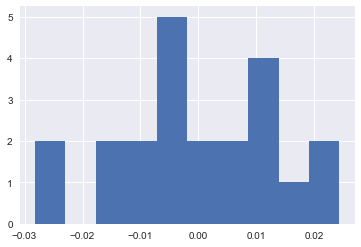

In [65]:
plt.hist(fit_1.resid)

In [66]:
fit_2 = sm.OLS(y, X.drop(['trend','Government','Income Index Lag 1'], axis = 1)).fit()

# Inspect the results
print(fit_2.summary())

                            OLS Regression Results                            
Dep. Variable:           Income Index   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     16.01
Date:                Sun, 18 Nov 2018   Prob (F-statistic):           0.000701
Time:                        16:54:08   Log-Likelihood:                 47.649
No. Observations:                  22   AIC:                            -91.30
Df Residuals:                      20   BIC:                            -89.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Government Lag 1  6.156e-10   1.54e-10  

Conclusion 
* Using Goverment funding from the previous year, to predict Income Index performance in the current year, the predictive power (R squared) is only 0.417, indicating that Goverment funding is not a strong predictor of Income Index performance

(array([2., 1., 3., 2., 2., 7., 0., 1., 1., 3.]),
 array([-0.04776896, -0.03796204, -0.02815512, -0.01834821, -0.00854129,
         0.00126563,  0.01107254,  0.02087946,  0.03068638,  0.0404933 ,
         0.05030021]),
 <a list of 10 Patch objects>)

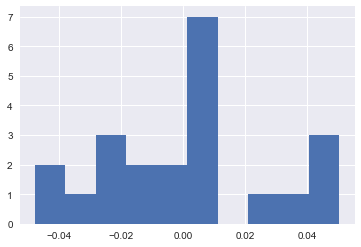

In [67]:
plt.hist(fit_2.resid)